# Module 54: Time Series

Author: Juliho Castillo Colmenares Ph.D.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Step 1: Download historical data
start_date = "2019-01-01"
end_date = "2024-01-01"

In [3]:
ibm_data = yf.download("IBM", start=start_date, end=end_date)
ibm_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM,IBM
Date,,,,,,
2019-01-02 00:00:00+00:00,83.947777,110.143402,110.879539,106.778206,107.084129,4434935
2019-01-03 00:00:00+00:00,82.271858,107.944550,109.827919,107.734222,109.493309,4546648
2019-01-04 00:00:00+00:00,85.485214,112.160614,112.323135,109.407265,109.856598,4683779
2019-01-07 00:00:00+00:00,86.089989,112.954109,113.604210,111.539200,112.332695,3923755
2019-01-08 00:00:00+00:00,87.314110,114.560226,115.267685,113.747612,114.397705,4982726
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,157.716400,162.139999,162.410004,161.000000,161.100006,2439800
2023-12-26 00:00:00+00:00,158.757217,163.210007,163.309998,162.050003,162.229996,1772400


In [4]:
walmart_data = yf.download("WMT", start=start_date, end=end_date)
walmart_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT,WMT
Date,,,,,,
2019-01-02 00:00:00+00:00,28.355377,31.113333,31.216667,30.546667,30.546667,24458100
2019-01-03 00:00:00+00:00,28.209566,30.953333,31.570000,30.900000,31.070000,24831900
2019-01-04 00:00:00+00:00,28.385757,31.146667,31.219999,30.896667,31.070000,24087300
2019-01-07 00:00:00+00:00,28.719919,31.513332,31.723333,31.059999,31.206667,23369100
2019-01-08 00:00:00+00:00,28.920422,31.733334,31.920000,31.303333,31.686666,21602700
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,51.712521,52.216667,52.383331,51.720001,51.816666,19405500
2023-12-26 00:00:00+00:00,51.633293,52.136665,52.330002,52.036667,52.216667,11679900


In [5]:
# Step 2: Correlation Analysis

# Create DataFrames from the Close prices for alignment
ibm_close = ibm_data["Close"]["IBM"].to_frame()
ibm_close

,IBM
Date,
2019-01-02 00:00:00+00:00,110.143402
2019-01-03 00:00:00+00:00,107.944550
2019-01-04 00:00:00+00:00,112.160614
2019-01-07 00:00:00+00:00,112.954109
2019-01-08 00:00:00+00:00,114.560226
...,...
2023-12-22 00:00:00+00:00,162.139999
2023-12-26 00:00:00+00:00,163.210007
2023-12-27 00:00:00+00:00,163.460007


In [6]:
walmart_close = walmart_data["Close"]["WMT"].to_frame()
walmart_close

,WMT
Date,
2019-01-02 00:00:00+00:00,31.113333
2019-01-03 00:00:00+00:00,30.953333
2019-01-04 00:00:00+00:00,31.146667
2019-01-07 00:00:00+00:00,31.513332
2019-01-08 00:00:00+00:00,31.733334
...,...
2023-12-22 00:00:00+00:00,52.216667
2023-12-26 00:00:00+00:00,52.136665
2023-12-27 00:00:00+00:00,52.626667


In [7]:
aligned_data = ibm_close.join(walmart_close, how="inner").rename(
    columns={"IBM": "Close_IBM", "WMT": "Close_WMT"}
)
aligned_data

,Close_IBM,Close_WMT
Date,,
2019-01-02 00:00:00+00:00,110.143402,31.113333
2019-01-03 00:00:00+00:00,107.944550,30.953333
2019-01-04 00:00:00+00:00,112.160614,31.146667
2019-01-07 00:00:00+00:00,112.954109,31.513332
2019-01-08 00:00:00+00:00,114.560226,31.733334
...,...,...
2023-12-22 00:00:00+00:00,162.139999,52.216667
2023-12-26 00:00:00+00:00,163.210007,52.136665
2023-12-27 00:00:00+00:00,163.460007,52.626667


In [8]:
# Calculate the correlation between IBM and Walmart closing prices
correlation = aligned_data["Close_IBM"].corr(aligned_data["Close_WMT"])
correlation

np.float64(0.25467644544033363)

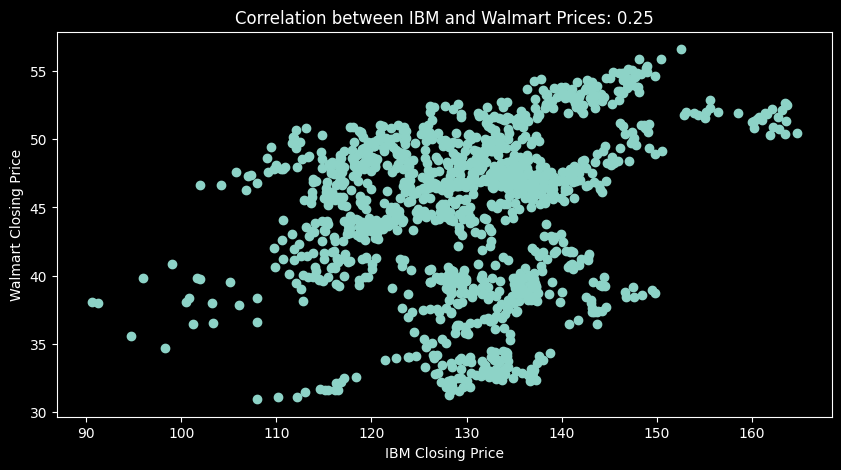

In [9]:
# Plot scatter plot for visual correlation
plt.figure(figsize=(10, 5))
plt.scatter(aligned_data["Close_IBM"], aligned_data["Close_WMT"])
plt.xlabel("IBM Closing Price")
plt.ylabel("Walmart Closing Price")
plt.title(f"Correlation between IBM and Walmart Prices: {correlation:.2f}")
plt.show()

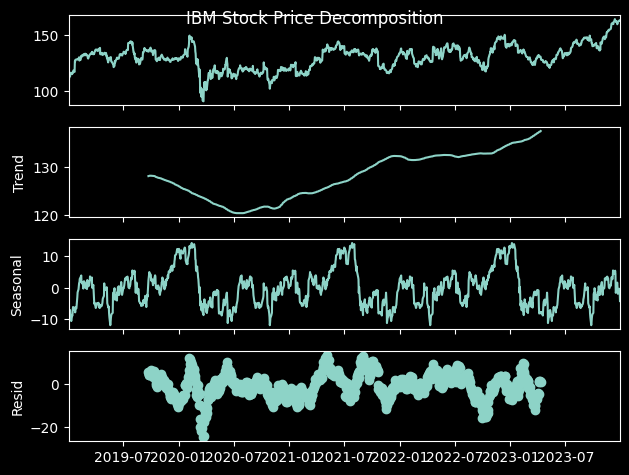

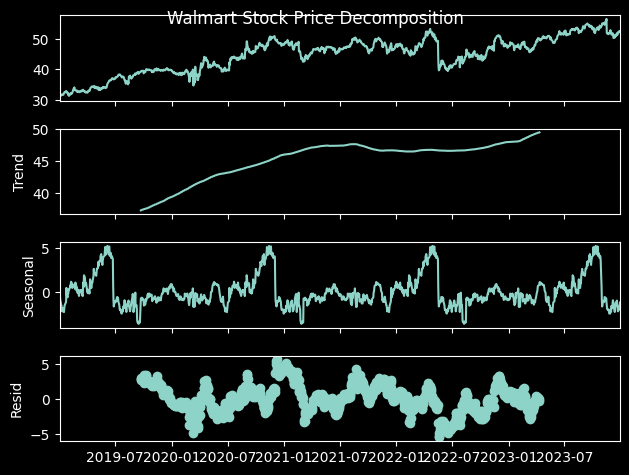

In [10]:
# Step 3: Time Series Decomposition
# Decompose both time series and plot
for stock_data, name in zip([ibm_data, walmart_data], ["IBM", "Walmart"]):
    decomposed = seasonal_decompose(stock_data["Close"], model="additive", period=365)
    decomposed.plot()
    plt.suptitle(f"{name} Stock Price Decomposition")
    plt.show()

<Figure size 1000x500 with 0 Axes>

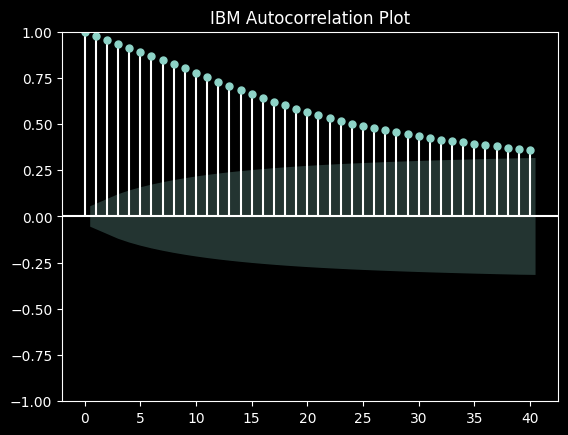

<Figure size 1000x500 with 0 Axes>

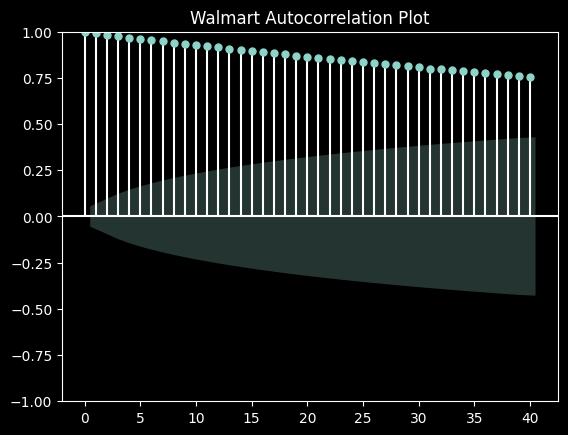

In [11]:
# Plot correlograms for both IBM and Walmart stock prices
for stock_data, name in zip([ibm_data, walmart_data], ["IBM", "Walmart"]):
    plt.figure(figsize=(10, 5))
    plot_acf(stock_data["Close"].dropna(), lags=40)
    plt.title(f"{name} Autocorrelation Plot")
    plt.show()

In [12]:
# Step 4: Dickey-Fuller Test for stationarity
def adf_test(series, name):
    result = adfuller(series)
    print(f"ADF Statistic for {name}: {result[0]}")
    print(f"p-value for {name}: {result[1]}")
    if result[1] < 0.05:
        print(f"The {name} series is stationary.")
    else:
        print(f"The {name} series is not stationary.")

In [13]:
adf_test(ibm_data["Close"], "IBM")
adf_test(walmart_data["Close"], "Walmart")

ADF Statistic for IBM: -3.2264847648019135
p-value for IBM: 0.018501917606608874
The IBM series is stationary.
ADF Statistic for Walmart: -2.148573782980081
p-value for Walmart: 0.22543641042674617
The Walmart series is not stationary.


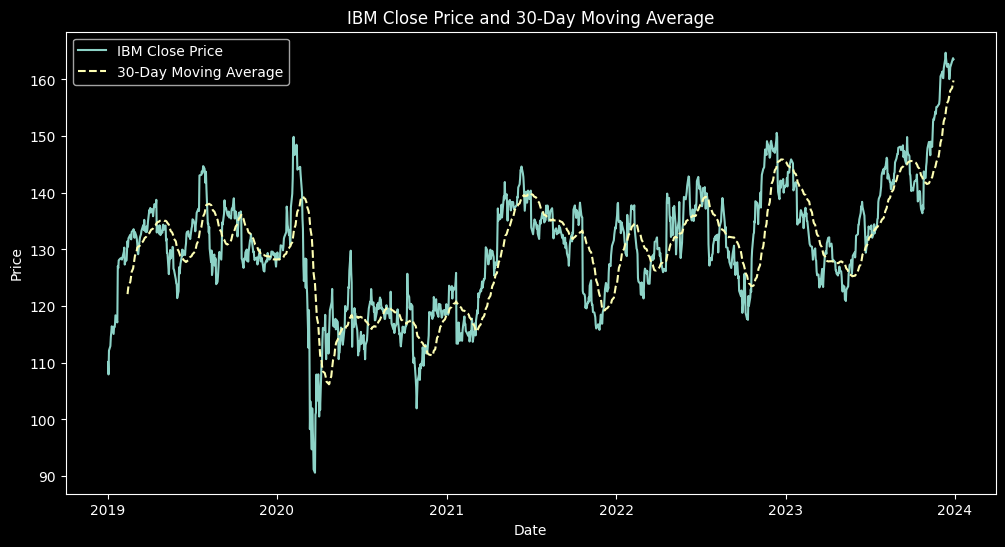

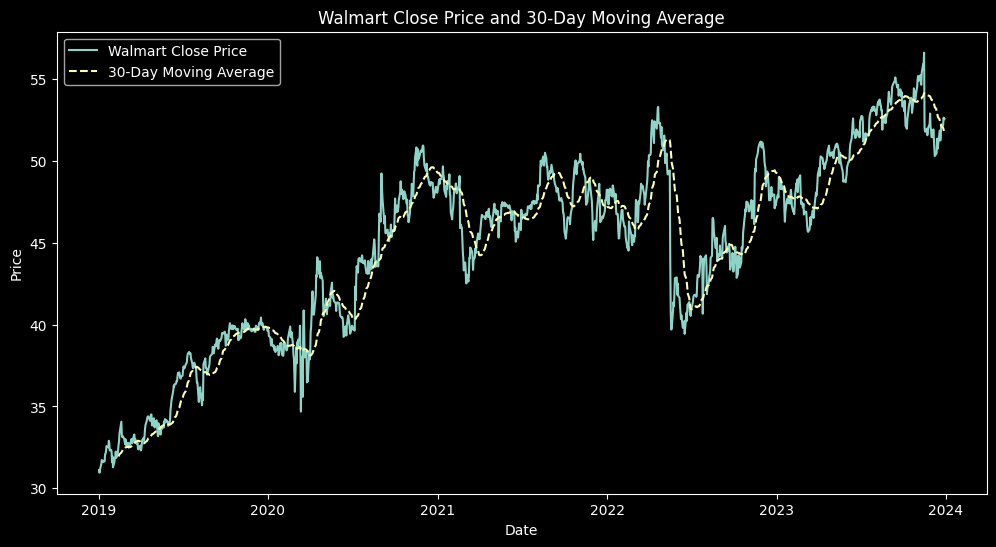

In [14]:
# Step 5: Moving Average Analysis
# Calculate 30-day moving average for both stocks
for stock_data, name in zip([ibm_data, walmart_data], ["IBM", "Walmart"]):
    stock_data["30_day_MA"] = stock_data["Close"].rolling(window=30).mean()

    # Plot original and moving average prices
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data["Close"], label=f"{name} Close Price")
    plt.plot(stock_data["30_day_MA"], label="30-Day Moving Average", linestyle="--")
    plt.title(f"{name} Close Price and 30-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [15]:
# Step 6: One-Day Forecast (simple projection using last moving average value)
# For simplicity, we use the last available 30-day moving average as the forecast
for stock_data, name in zip([ibm_data, walmart_data], ["IBM", "Walmart"]):
    last_moving_avg = stock_data["30_day_MA"].iloc[-1]
    print(
        f"One-day forecast for {name} based on the 30-day moving average: {last_moving_avg}"
    )

One-day forecast for IBM based on the 30-day moving average: 159.8143346150716
One-day forecast for Walmart based on the 30-day moving average: 51.654666900634766
